# Eval 100 SDG vs Human with Controlled Distribution

In [108]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')


SDG_PATH = "sdg_eval.json"
HUMAN_PATH = "human_eval.json"

with open("human_out.json", 'r') as json_file:
    human_data = json.load(json_file)
with open("sdg_out.json", 'r') as json_file:
    sdg_data = json.load(json_file)
with open("human_eval.json", 'r') as json_file:
    human_eval= json.load(json_file)
with open("sdg_eval.json", 'r') as json_file:
    sdg_eval = json.load(json_file)


df_human = pd.DataFrame(human_data)
df_human['id'] = df_human[['img_id']]
df_human = df_human[['id','question','short_answer','reasoned_answer']]
df_sdg = pd.DataFrame(sdg_data)

df_human_eval = pd.DataFrame(human_eval)
df_human_eval['id'] = df_human_eval[['image_id']]
df_human_eval = df_human_eval[['id','accuracy', 'logic', 'clarity', 'detail', 'irrelevance', 'plausibility']]
df_sdg_eval = pd.DataFrame(sdg_eval)

In [109]:
df_sdg.head(2)

,id,question,short_answer,reasoned_answer
0,sample_009,What is the primary purpose of the desk?,A workspace,The desk serves as a workspace for someone who...
1,sample_009,Where is the clock positioned on the desk?,Right side,The clock is positioned towards the right side...


In [110]:
df_human.head(2)

,id,question,short_answer,reasoned_answer
0,sample_001,What time does the photo is taken?,Approximately at afternoon around 1 PM,Because it is very sunny and there is no exist...
1,sample_001,Why the man carrying a purple backpack?,Because he is carrying things for the baby,"The man is pushing a stroller, which indicates..."


In [111]:
df_human_eval.head(2)

,id,accuracy,logic,clarity,detail,irrelevance,plausibility
0,sample_001,3,3,3,1,1,3
1,sample_001,3,3,3,1,1,3


In [112]:
df_sdg_eval.head(2)

,id,accuracy,logic,clarity,detail,irrelevance,plausibility
0,sample_009,3,3,3,2,2,3
1,sample_009,3,3,3,1,1,1


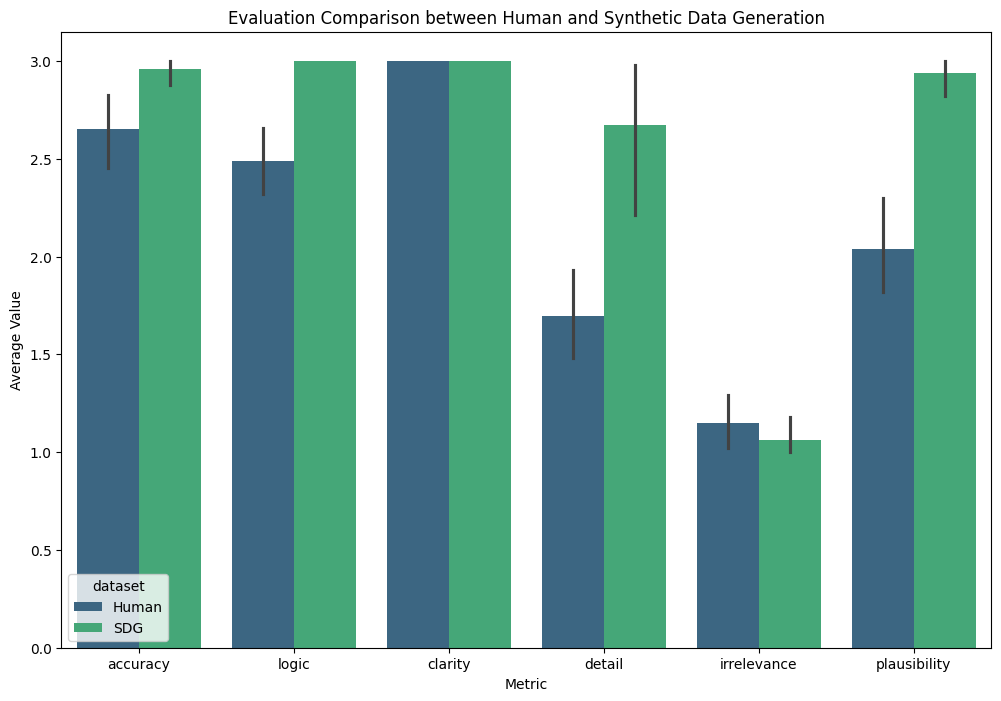

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_human_eval and df_sdg_eval are your dataframes

# Calculate average values for numeric columns except 'id'
avg_human = df_human_eval.groupby('id').mean().reset_index()
avg_sdg = df_sdg_eval.groupby('id').mean().reset_index()

# Melt the dataframes to make them suitable for visualization
melted_human = pd.melt(avg_human, id_vars='id', var_name='metric', value_name='average_value')
melted_sdg = pd.melt(avg_sdg, id_vars='id', var_name='metric', value_name='average_value')

# Combine the two dataframes for comparison
merged_df = pd.concat([melted_human.assign(dataset='Human'), melted_sdg.assign(dataset='SDG')])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='metric', y='average_value', hue='dataset', data=merged_df, palette='viridis')
plt.title('Evaluation Comparison between Human and Synthetic Data Generation')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()


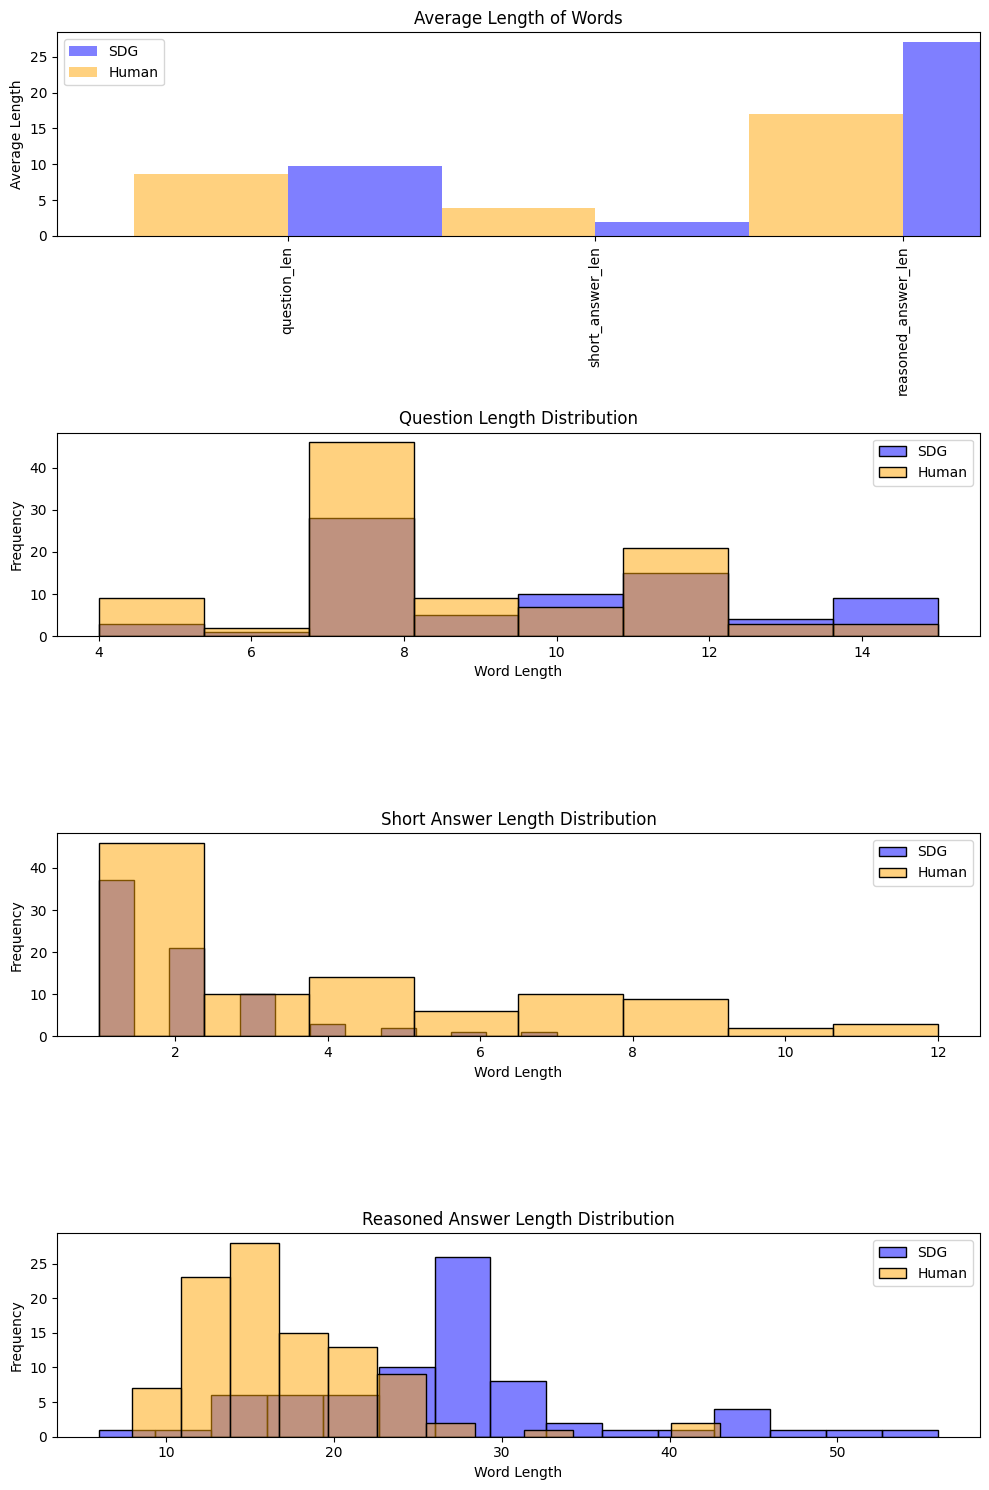

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sdg and df_human are your dataframes

# Calculate the average length of words for question, short_answer, and reasoned_answer
df_sdg['question_len'] = df_sdg['question'].apply(lambda x: len(x.split()))
df_sdg['short_answer_len'] = df_sdg['short_answer'].apply(lambda x: len(x.split()))
df_sdg['reasoned_answer_len'] = df_sdg['reasoned_answer'].apply(lambda x: len(x.split()))

df_human['question_len'] = df_human['question'].apply(lambda x: len(x.split()))
df_human['short_answer_len'] = df_human['short_answer'].apply(lambda x: len(x.split()))
df_human['reasoned_answer_len'] = df_human['reasoned_answer'].apply(lambda x: len(x.split()))

avg_len_sdg = df_sdg[['question_len', 'short_answer_len', 'reasoned_answer_len']].mean()
avg_len_human = df_human[['question_len', 'short_answer_len', 'reasoned_answer_len']].mean()

df_sdg['question_prefix'] = df_sdg['question'].apply(lambda x: x.split()[0])
df_human['question_prefix'] = df_human['question'].apply(lambda x: x.split()[0])

prefix_count_sdg = df_sdg['question_prefix'].value_counts()
prefix_count_human = df_human['question_prefix'].value_counts()

fig, axes = plt.subplots(4, 1, figsize=(10, 15))

avg_len_sdg.plot(kind='bar', color='blue', alpha=0.5, ax=axes[0], position=0, label='SDG')
avg_len_human.plot(kind='bar', color='orange', alpha=0.5, ax=axes[0], position=1, label='Human')
axes[0].set_title('Average Length of Words')
axes[0].set_ylabel('Average Length')
axes[0].legend()

sns.histplot(df_sdg['question_len'], color='blue', alpha=0.5, ax=axes[1], label='SDG', kde=False)
sns.histplot(df_human['question_len'], color='orange', alpha=0.5, ax=axes[1], label='Human', kde=False)
axes[1].set_title('Question Length Distribution')
axes[1].set_xlabel('Word Length')
axes[1].set_ylabel('Frequency')
axes[1].legend()

sns.histplot(df_sdg['short_answer_len'], color='blue', alpha=0.5, ax=axes[2], label='SDG', kde=False)
sns.histplot(df_human['short_answer_len'], color='orange', alpha=0.5, ax=axes[2], label='Human', kde=False)
axes[2].set_title('Short Answer Length Distribution')
axes[2].set_xlabel('Word Length')
axes[2].set_ylabel('Frequency')
axes[2].legend()

sns.histplot(df_sdg['reasoned_answer_len'], color='blue', alpha=0.5, ax=axes[3], label='SDG', kde=False)
sns.histplot(df_human['reasoned_answer_len'], color='orange', alpha=0.5, ax=axes[3], label='Human', kde=False)
axes[3].set_title('Reasoned Answer Length Distribution')
axes[3].set_xlabel('Word Length')
axes[3].set_ylabel('Frequency')
axes[3].legend()

plt.tight_layout()
plt.show()


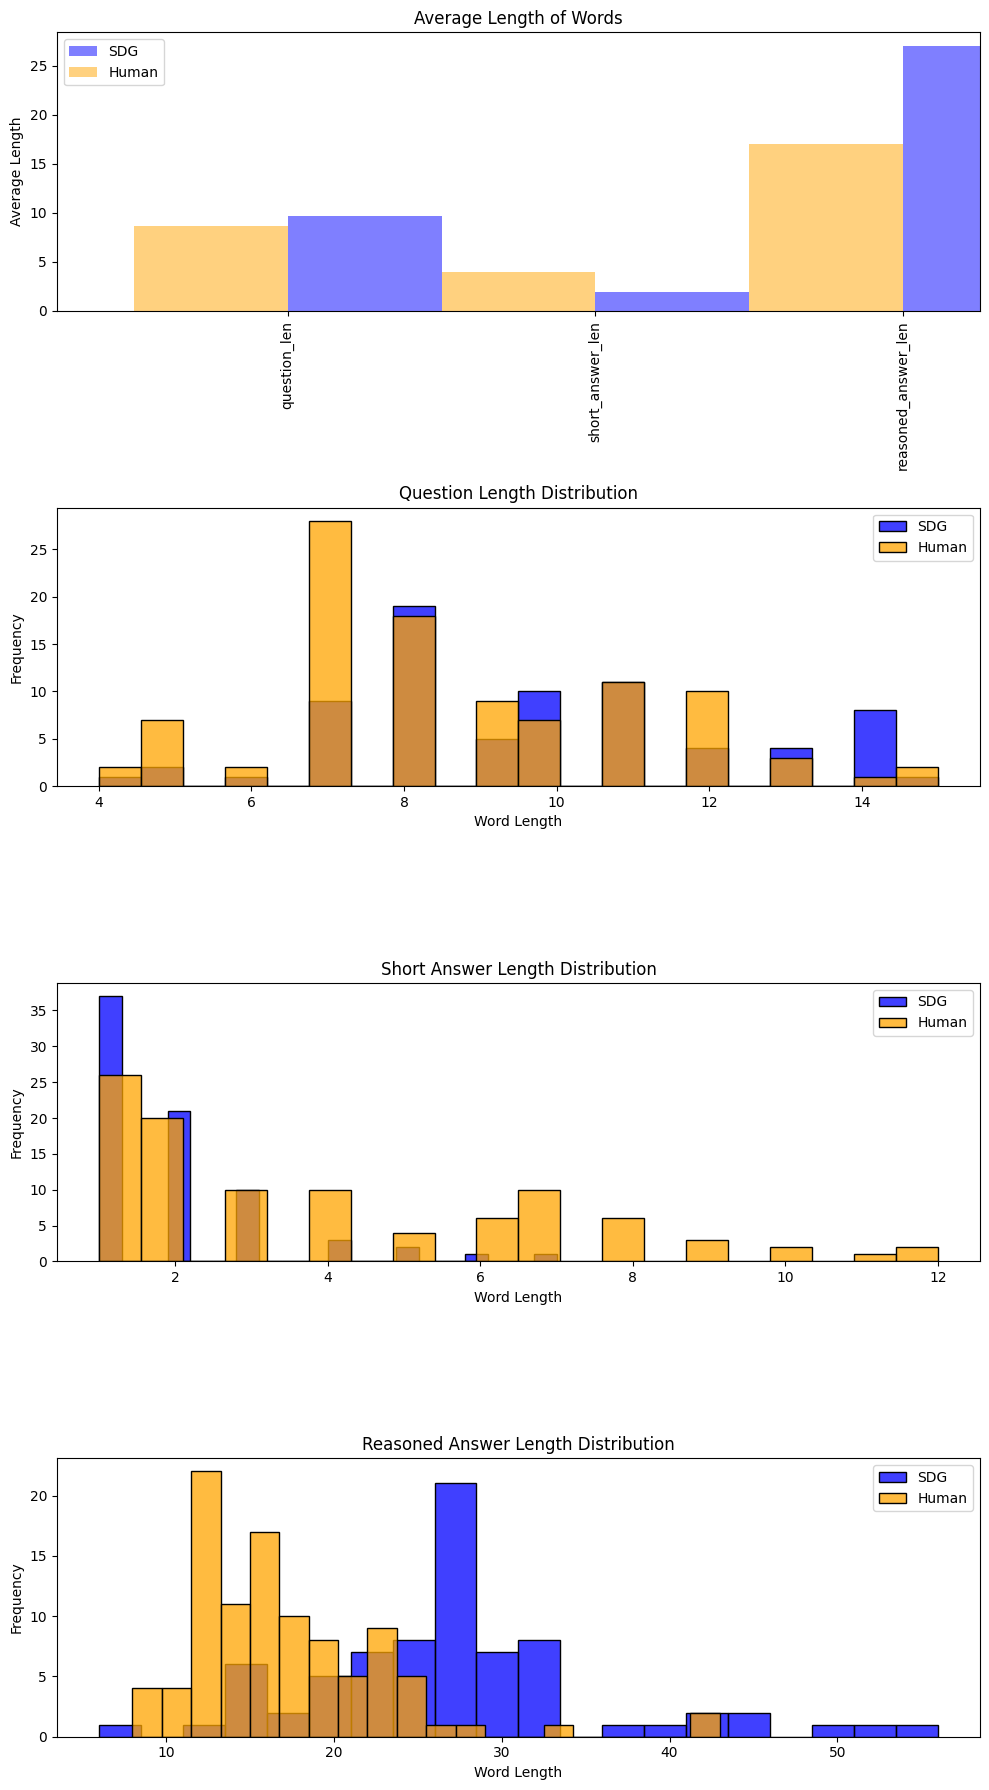

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sdg and df_human are your dataframes

# Calculate the average length of words for question, short_answer, and reasoned_answer
df_sdg['question_len'] = df_sdg['question'].apply(lambda x: len(x.split()))
df_sdg['short_answer_len'] = df_sdg['short_answer'].apply(lambda x: len(x.split()))
df_sdg['reasoned_answer_len'] = df_sdg['reasoned_answer'].apply(lambda x: len(x.split()))

df_human['question_len'] = df_human['question'].apply(lambda x: len(x.split()))
df_human['short_answer_len'] = df_human['short_answer'].apply(lambda x: len(x.split()))
df_human['reasoned_answer_len'] = df_human['reasoned_answer'].apply(lambda x: len(x.split()))

avg_len_sdg = df_sdg[['question_len', 'short_answer_len', 'reasoned_answer_len']].mean()
avg_len_human = df_human[['question_len', 'short_answer_len', 'reasoned_answer_len']].mean()

# Calculate the distribution of prefixes in the question
df_sdg['question_prefix'] = df_sdg['question'].apply(lambda x: x.split()[0])
df_human['question_prefix'] = df_human['question'].apply(lambda x: x.split()[0])

prefix_count_sdg = df_sdg['question_prefix'].value_counts()
prefix_count_human = df_human['question_prefix'].value_counts()

# Non-pie chart figure
fig1, axes1 = plt.subplots(4, 1, figsize=(10, 18))

# Average length of words comparison
avg_len_sdg.plot(kind='bar', color='blue', alpha=0.5, ax=axes1[0], position=0, label='SDG')
avg_len_human.plot(kind='bar', color='orange', alpha=0.5, ax=axes1[0], position=1, label='Human')
axes1[0].set_title('Average Length of Words')
axes1[0].set_ylabel('Average Length')
axes1[0].legend()

# Histogram of word lengths comparison
sns.histplot(df_sdg['question_len'], color='blue', ax=axes1[1], label='SDG', bins=20)
sns.histplot(df_human['question_len'], color='orange', ax=axes1[1], label='Human', bins=20)
axes1[1].set_title('Question Length Distribution')
axes1[1].set_xlabel('Word Length')
axes1[1].set_ylabel('Frequency')
axes1[1].legend()

sns.histplot(df_sdg['short_answer_len'], color='blue', ax=axes1[2], label='SDG', bins=20)
sns.histplot(df_human['short_answer_len'], color='orange', ax=axes1[2], label='Human', bins=20)
axes1[2].set_title('Short Answer Length Distribution')
axes1[2].set_xlabel('Word Length')
axes1[2].set_ylabel('Frequency')
axes1[2].legend()

sns.histplot(df_sdg['reasoned_answer_len'], color='blue', ax=axes1[3], label='SDG', bins=20)
sns.histplot(df_human['reasoned_answer_len'], color='orange', ax=axes1[3], label='Human', bins=20)
axes1[3].set_title('Reasoned Answer Length Distribution')
axes1[3].set_xlabel('Word Length')
axes1[3].set_ylabel('Frequency')
axes1[3].legend()

plt.tight_layout()
plt.show()


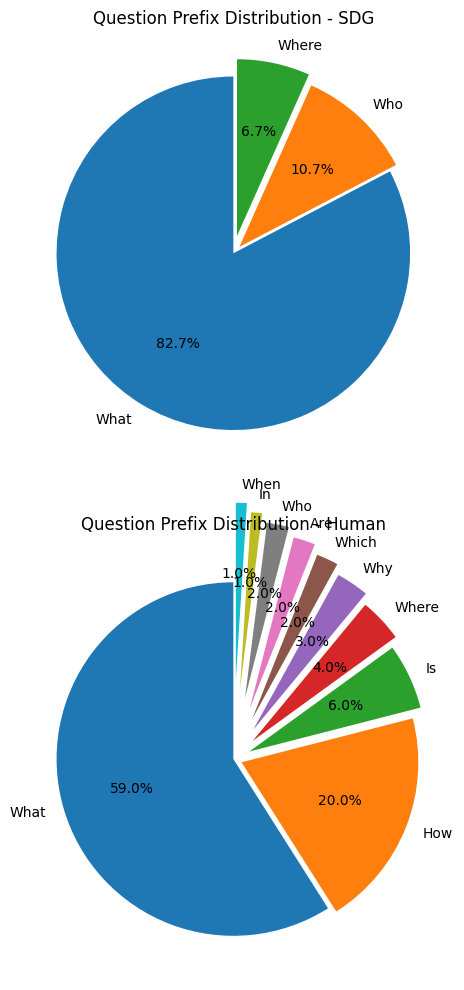

In [137]:
# Pie chart figure
fig2, axes2 = plt.subplots(2, 1, figsize=(8, 10))

# Prefix distribution comparison as exploding pie chart
explode_sdg = tuple([0.05 * i for i in range(len(prefix_count_sdg))])
explode_human = tuple([0.05 * i for i in range(len(prefix_count_human))])

axes2[0].pie(prefix_count_sdg, labels=prefix_count_sdg.index, autopct='%1.1f%%', startangle=90, explode=explode_sdg)
axes2[0].set_title('Question Prefix Distribution - SDG')

axes2[1].pie(prefix_count_human, labels=prefix_count_human.index, autopct='%1.1f%%', startangle=90, explode=explode_human)
axes2[1].set_title('Question Prefix Distribution - Human')

plt.tight_layout()
plt.show()